# DBSCAN algorithm in Python
 
 
## what is DBSCAN ?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a method that identify distinctive clusters in the data, based on the key idea that a cluster is a group of high data point density, separated from other such clusters by regions of low data point density. The main idea is to find highly dense regions and consider them as one cluster. It can easily discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

## Why do we need DBSCAN Clustering?

Clustering is an unsupervised learning technique where we try to group the data points based on specific characteristics. There are various clustering algorithms with K-Means and Hierarchical being the most used ones. Some of the use cases of clustering algorithms include:

Document Clustering, 
Recommendation Engine, 
Image Segmentation, 
Market Segmentation , 
Search Result Grouping  ,
and Anomaly Detection.
All these problems use the concept of clustering to reach their end goal. Therefore, it is crucial to understand the concept of clustering. But here’s the issue with these two clustering algorithms.

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.


<img src="image1.png" >

<img src="image2.webp" >
Awesome! DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.




# implementation

## Step 1: Importing all the required libraries:



In [21]:
# Importing numpy library as nmp  
import numpy as nmp  
# Importing pandas library as pds  
import pandas as pds  
# Importing matplotlib library as pplt  
import matplotlib.pyplot as pplt  
# Importing DBSCAN from cluster module of Sklearn library  
from sklearn.cluster import DBSCAN  
# Importing StandardSclaer and normalize from preprocessing module of Sklearn library  
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import normalize  
# Importing PCA from decomposition module of Sklearn  
from sklearn.decomposition import PCA  


## Step 2: Loading the data

In this step, we have to load that data, and we can do this by importing or loading the dataset (that is required in the DBSCAN algorithm to work on it) inside the program. To load the dataset inside the program, we will use the read.csv() function of the panda's library and print the information from the dataset as we have done below:



In [22]:
# Loading the data inside an initialized variable  
M = pds.read_csv('sample.csv') # Path of dataset file  
# Dropping the CUST_ID column from the dataset with drop() function  
M = M.drop('CUST_ID', axis = 1)  
# Using fillna() function to handle missing values  
M.fillna(method ='ffill', inplace = True)  
# Printing dataset head in output  
print(M.head())  


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

## Step 3: Preprocessing the data

Now, we will start preprocessing the data of the dataset in this step by using the functions of preprocessing module of the Sklearn library. We have to use the following technique while preprocessing the data with Sklearn library functions:



In [23]:
# Initializing a variable with the StandardSclaer() function  
scalerFD = StandardScaler()  
# Transforming the data of dataset with Scaler  
M_scaled = scalerFD.fit_transform(M)  
# To make sure that data will follow gaussian distribution  
# We will normalize the scaled data with normalize() function  
M_normalized = normalize(M_scaled)  
# Now we will convert numpy arrays in the dataset into dataframes of panda  
M_normalized = pds.DataFrame(M_normalized) 

## Step 4: Reduce the dimensionality of the data

In this step, we will be reducing the dimensionality of the scaled and normalized data so that the data can be visualized easily inside the program. We have to use the PCA function in the following way in order to transform the data and reduce its dimensionality:







In [25]:
# Initializing a variable with the PCA() function  
pcaFD = PCA(n_components = 2) # components of data  
# Transforming the normalized data with PCA  
M_principal = pcaFD.fit_transform(M_normalized)  
# Making dataframes from the transformed data  
M_principal = pds.DataFrame(M_principal)  
# Creating two columns in the transformed data  
M_principal.columns = ['C1', 'C2']  
# Printing the head of the transformed data  
print(M_principal.head())  



         C1        C2
0 -0.489949 -0.679977
1 -0.519098  0.544821
2  0.330633  0.268880
3 -0.481656 -0.097614
4 -0.563512 -0.482506


## Step 5: Build a clustering model

Now, this is the most important step of the implementation as here we have to build a clustering model of the data (on which we are performing operations), and we can do this by using the DBSCAN function of the Sklearn library as we have used below:







In [26]:
# Creating clustering model of the data using the DBSCAN function and providing parameters in it  
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(M_principal)  
# Labelling the clusters we have created in the dataset  
labeling = db_default.labels_  


## Step 6:  Visualize the clustering model:



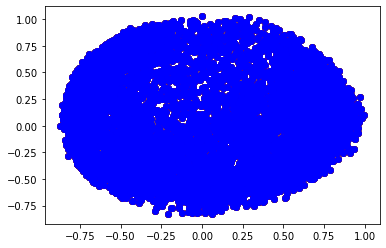

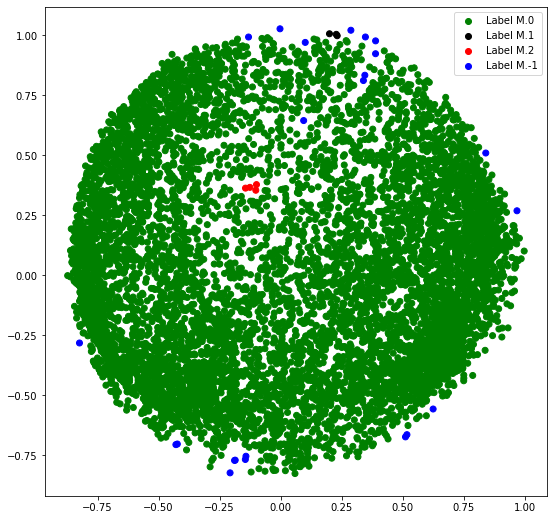

In [27]:
# Visualization of clustering model by giving different colours  
colours = {}  
# First colour in visualization is green  
colours[0] = 'g'  
# Second colour in visualization is black  
colours[1] = 'k'  
# Third colour in visualization is red  
colours[2] = 'r'  
# Last colour in visualization is blue  
colours[-1] = 'b'  
# Creating a colour vector for each data point in the dataset cluster  
cvec = [colours[label] for label in labeling]  
# Construction of the legend  
# Scattering of green colour  
g = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='g');  
# Scattering of black colour  
k = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='k');  
# Scattering of red colour  
r = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='r');  
# Scattering of green colour  
b = pplt.scatter(M_principal['C1'], M_principal['C2'], color ='b');   
# Plotting C1 column on the X-Axis and C2 on the Y-Axis  
# Fitting the size of the figure with figure function  
pplt.figure(figsize =(9, 9))  
# Scattering the data points in the Visualization graph  
pplt.scatter(M_principal['C1'], M_principal['C2'], c = cvec)  
# Building the legend with the coloured data points and labelled  
pplt.legend((g, k, r, b), ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1'))  
# Showing Visualization in the output  
pplt.show()  


## Step 7: Tuning the parameters:

In this step, we will be tuning the parameters of the module by changing the parameters that we have previously given in the DBSCAN function as follow:







In [28]:
# Tuning the parameters of the model inside the DBSCAN function  
dts = DBSCAN(eps = 0.0375, min_samples = 50).fit(M_principal)  
# Labelling the clusters of data points  
labeling = dts.labels_  



## Step 8: Visualization of the changes

Now, after tuning the parameters of the cluster model we created, we will visualize the changes that will come in the cluster by labelling the data points in the dataset with different colours as we have done before.





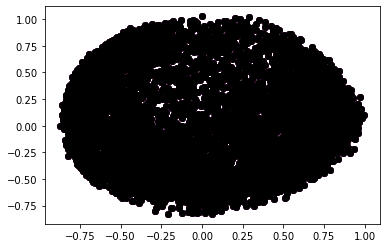

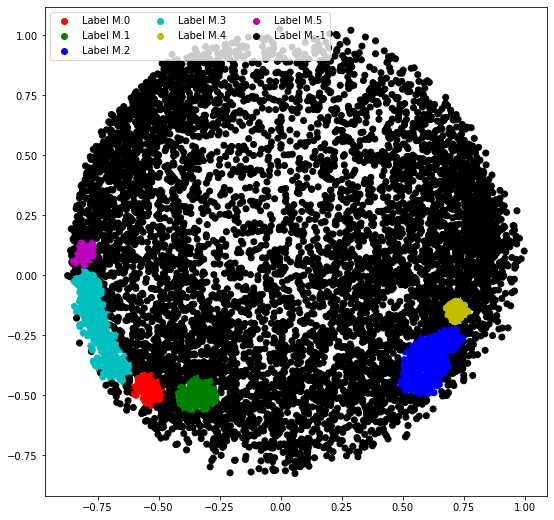

In [29]:
# Labelling with different colours  
colours1 = {}  
# labelling with Red colour  
colours1[0] = 'r'  
# labelling with Green colour  
colours1[1] = 'g'  
# labelling with Blue colour  
colours1[2] = 'b'  
colours1[3] = 'c'  
# labelling with Yellow colour  
colours1[4] = 'y'  
# Magenta colour  
colours1[5] = 'm'  
# labelling with Black colour  
colours1[-1] = 'k'  
# Labelling the data points with the colour variable we have defined  
cvec = [colours1[label] for label in labeling]  
# Defining all colour that we will use  
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]  
# Scattering the colours onto the data points  
r = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[0])  
g = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[1])  
b = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[2])  
c = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[3])  
y = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[4])  
m = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[5])  
k = pplt.scatter(  
        M_principal['C1'], M_principal['C2'], marker ='o', color = colors[6])  
# Fitting the size of the figure with figure function  
pplt.figure(figsize =(9, 9))  
# Scattering column 1 into X-axis and column 2 into y-axis  
pplt.scatter(M_principal['C1'], M_principal['C2'], c = cvec)  
# Constructing a legend with the colours we have defined  
pplt.legend((r, g, b, c, y, m, k),  
           ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.3', 'Label M.4','Label M.5', 'Label M.-1'), # Using different labels for data points  
           scatterpoints = 1, # Defining the scatter point  
           loc ='upper left', # Location of cluster scattering  
           ncol = 3, # Number of columns  
           fontsize = 10) # Size of the font  
# Displaying the visualisation of changes in cluster scattering  
pplt.show()  